In [1]:
from projection_funcs import *
%matplotlib inline

Load the kernels:

In [2]:
KERNEL_DATAFOLDER = '/home/local/Isis/data/juno/kernels/'
pcks  = sorted(glob.glob(KERNEL_DATAFOLDER+"pck/pck*.tpc"))
spks  = sorted(glob.glob(KERNEL_DATAFOLDER+"spk/jup*.bsp"))
lsks  = sorted(glob.glob(KERNEL_DATAFOLDER+"lsk/naif*.tls"))

kernels = [pcks[-1], spks[-1], lsks[-1]]
for kernel in kernels:
    spiceypy.furnsh(kernel)

Load the image and calculate the image ET

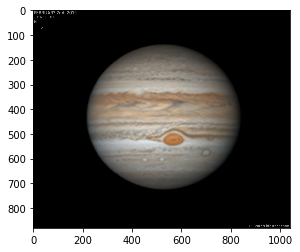

In [3]:
et  = spiceypy.utc2et('2019-02-02 10:07:06')
img = plt.imread('2019-02-02-1007_1-RGBdp.jpg')/255.

plt.imshow(img)
plt.show()

Get the ellipse defining Jupiter and calculate the vector pointing to each pixel in the J2000 frame.
Use a linear scaling in (x, y) to get angular distances

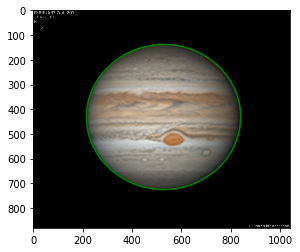

Building vectors:
 879/880


In [4]:
vecs = get_vec_from_image(img, et)

Now find the intercept of all the vectors and determine lat/lon of the intercept point

Projecting image:
 879/880


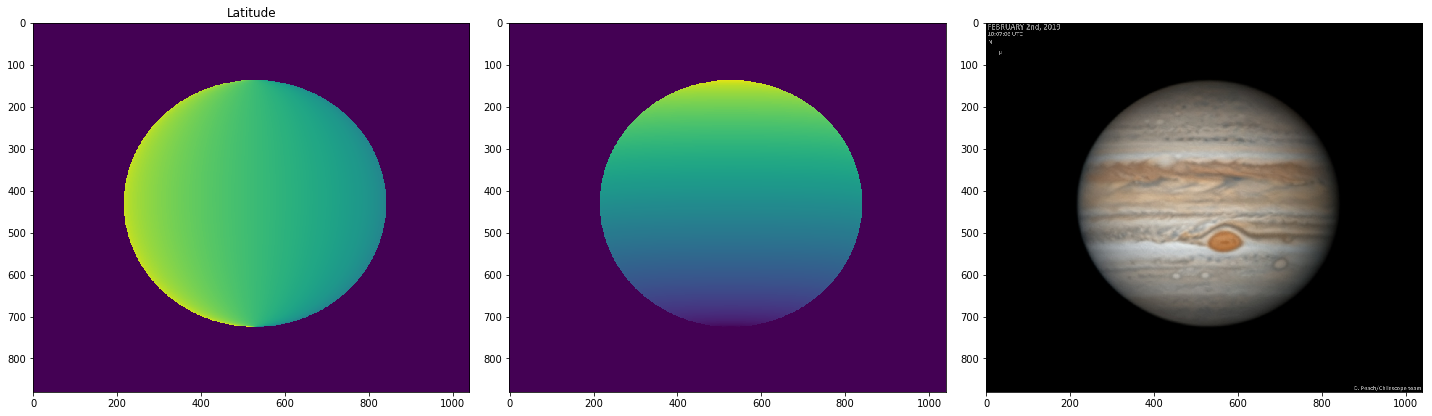

In [5]:
lon, lat = map_project(vecs, et)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(lon, vmin=0., vmax=360.)
ax2.imshow(lat, vmin=-90., vmax=90.)
ax3.imshow(img)

ax1.set_title("Longitude")
ax1.set_title("Latitude")

plt.tight_layout()
plt.show()

Plot the image on a uniform lat/lon grid

Interpolating R
Interpolating G
Interpolating B
0.0 0.9077550694524288


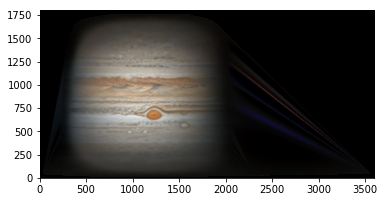

In [6]:
IMG = plot_map(lon, lat, img, pixres=0.1)  ## map onto a grid with resolution of 0.1deg x 0.1 deg

plt.imshow(IMG, origin='lower')
plt.show()